In [1]:
import torch
import numpy as np
from tqdm import tqdm
from scipy.stats.distributions import chi2
from scipy.stats import pearsonr
import pickle

import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import random
import matplotlib.animation as animation
import sys, os

path = os.path.dirname(os.getcwd())
sys.path.append(path)

from utils.plots import *
from utils.funcs import *
from utils.visualize_network import *
from utils.visualize_hidden_network import *

from boltzmann_machines.RTRBM import RTRBM
from boltzmann_machines.RBM import RBM

from data.load_data import *
from data.mock_data import *
from data.reshape_data import *

# spikes, behavior, coordinates, df, stimulus = loaddata()

"""
to dump:

path = os.path.dirname(os.getcwd())
pickle.dump(rtrbm, open(path + '\\results\\RTRBMs\\RTRBMs1', 'wb'))

to load:

check1 = pickle.load(open(path + '\\results\\RTRBMs\\RTRBMs1', 'rb'))
"""

"\nto dump:\n\npath = os.path.dirname(os.getcwd())\npickle.dump(rtrbm, open(path + '\\results\\RTRBMs\\RTRBMs1', 'wb'))\n\nto load:\n\ncheck1 = pickle.load(open(path + '\\results\\RTRBMs\\RTRBMs1', 'rb'))\n"

### 1 dimensional motion in a circle

Text(0.5, 1.0, 'Sample 3')

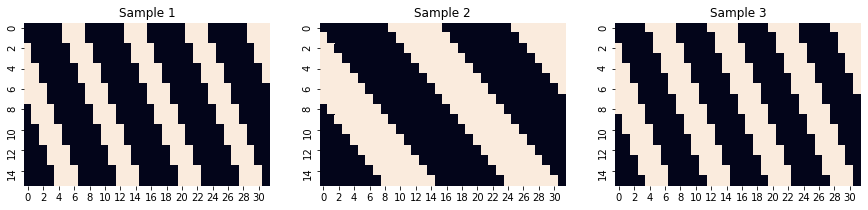

In [62]:
data = create_BB(N_V=16, T=32, n_samples=100, width_vec=[4, 5, 6, 7], velocity_vec=[1, 2, 3], boundary=False, r=2)

fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.heatmap(data[:, :, 0], ax=ax[0], cbar=False)
ax[0].set_title('Sample 1')
sns.heatmap(data[:, :, 1], ax=ax[1], cbar=False)
ax[1].set_title('Sample 2')
sns.heatmap(data[:, :, 2], ax=ax[2], cbar=False)
ax[2].set_title('Sample 3')

<AxesSubplot:>

In [35]:
rtrbm_BB_no_boundaries = RTRBM(data, N_H=10, device='cpu')
rtrbm_BB_no_boundaries.learn(n_epochs=1000, batchsize=10, lr=1e-3, mom=0, wc=0)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [11:53<00:00,  1.40it/s]


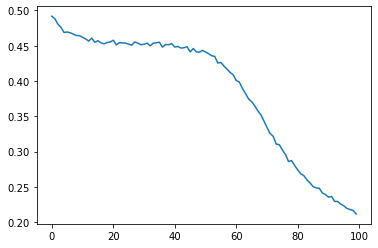

In [26]:
plt.plot(rtrbm_BB_no_boundaries.errors)

In [64]:
v1, r1 = rtrbm_BB_no_boundaries.infer(data[:, :8, 0])
v2, r2 = rtrbm_BB_no_boundaries.infer(data[:, :8, 1])
v3, r3 = rtrbm_BB_no_boundaries.infer(data[:, :8, 2])

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 240.20it/s]


In [60]:
rtrbm_BB_no_boundaries.W_acc = torch.zeros(10, 10)

<ipython-input-65-1fb46ee3632e>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rr1 = rtrbm_BB_no_boundaries.visible_to_expected_hidden(torch.tensor(data[:, :, 0], dtype=torch.float))
<ipython-input-65-1fb46ee3632e>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rr2 = rtrbm_BB_no_boundaries.visible_to_expected_hidden(torch.tensor(data[:, :, 1], dtype=torch.float))
<ipython-input-65-1fb46ee3632e>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rr3 = rtrbm_BB_no_boundaries.visible_to_expected_hidden(torch.tensor(data[:, :, 2], dtype=tor

Text(0.5, 1.0, 'Sample 3')

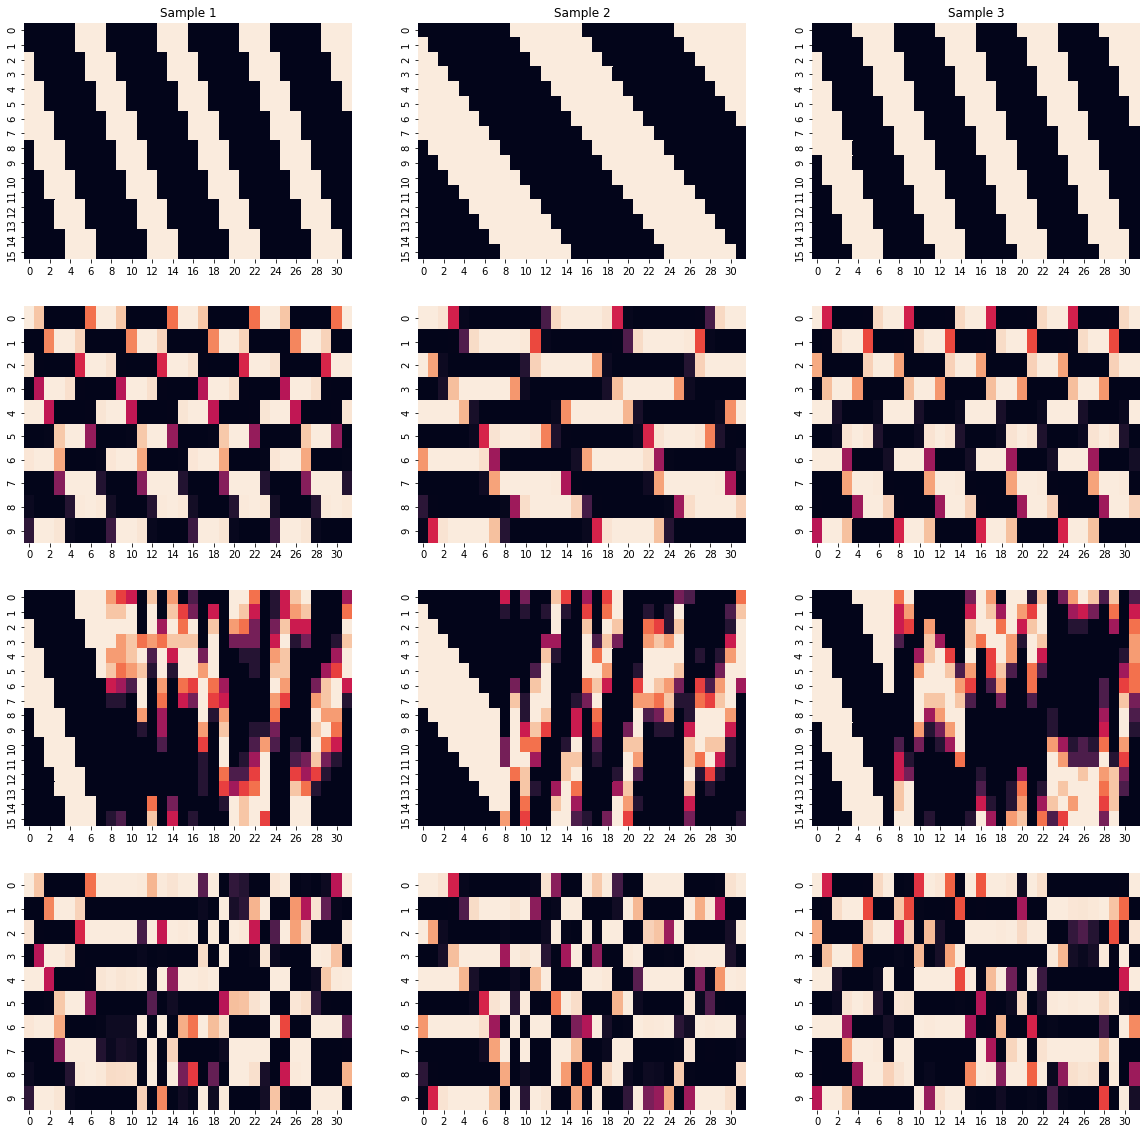

In [65]:
rr1 = rtrbm_BB_no_boundaries.visible_to_expected_hidden(torch.tensor(data[:, :, 0], dtype=torch.float))
rr2 = rtrbm_BB_no_boundaries.visible_to_expected_hidden(torch.tensor(data[:, :, 1], dtype=torch.float))
rr3 = rtrbm_BB_no_boundaries.visible_to_expected_hidden(torch.tensor(data[:, :, 2], dtype=torch.float))
fig, ax = plt.subplots(4, 3, figsize=(20,20))
sns.heatmap(data[:, :, 0], ax=ax[0, 0], cbar=False)
sns.heatmap(rr1, ax=ax[1, 0], cbar=False)
sns.heatmap(v1, ax=ax[2, 0], cbar=False)
sns.heatmap(r1, ax=ax[3, 0], cbar=False)
ax[0, 0].set_title('Sample 1')
sns.heatmap(data[:, :, 1], ax=ax[0, 1], cbar=False)
sns.heatmap(rr2, ax=ax[1, 1], cbar=False)
sns.heatmap(v2, ax=ax[2, 1], cbar=False)
sns.heatmap(r2, ax=ax[3, 1], cbar=False)
ax[0, 1].set_title('Sample 2')
sns.heatmap(data[:, :, 2], ax=ax[0, 2], cbar=False)
sns.heatmap(rr3, ax=ax[1, 2], cbar=False)
sns.heatmap(v3, ax=ax[2, 2], cbar=False)
sns.heatmap(r3, ax=ax[3, 2], cbar=False)
ax[0, 2].set_title('Sample 3')

In [ ]:
sns.heatmap(rtrbm_BB_no_boundaries.W)
plt.show()
sns.heatmap(rtrbm_BB_no_boundaries.W_acc)
plt.show()

In [61]:
rr1 = rtrbm_BB_no_boundaries.visible_to_expected_hidden(torch.tensor(data[:, :, 0], dtype=torch.float))
rr2 = rtrbm_BB_no_boundaries.visible_to_expected_hidden(torch.tensor(data[:, :, 1], dtype=torch.float))
rr3 = rtrbm_BB_no_boundaries.visible_to_expected_hidden(torch.tensor(data[:, :, 2], dtype=torch.float))
fig, ax = plt.subplots(4, 3, figsize=(20,20))
sns.heatmap(data[:, :, 0], ax=ax[0, 0], cbar=False)
sns.heatmap(rr1, ax=ax[1, 0], cbar=False)
sns.heatmap(v1, ax=ax[2, 0], cbar=False)
sns.heatmap(r1, ax=ax[3, 0], cbar=False)
ax[0, 0].set_title('Sample 1')
sns.heatmap(data[:, :, 1], ax=ax[0, 1], cbar=False)
sns.heatmap(rr2, ax=ax[1, 1], cbar=False)
sns.heatmap(v2, ax=ax[2, 1], cbar=False)
sns.heatmap(r2, ax=ax[3, 1], cbar=False)
ax[0, 1].set_title('Sample 2')
sns.heatmap(data[:, :, 2], ax=ax[0, 2], cbar=False)
sns.heatmap(rr3, ax=ax[1, 2], cbar=False)
sns.heatmap(v3, ax=ax[2, 2], cbar=False)
sns.heatmap(r3, ax=ax[3, 2], cbar=False)
ax[0, 2].set_title('Sample 3')

<ipython-input-61-1fb46ee3632e>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rr1 = rtrbm_BB_no_boundaries.visible_to_expected_hidden(torch.tensor(data[:, :, 0], dtype=torch.float))


RuntimeError: size mismatch, got 10, 10x16,256

### Simple sequential data

<AxesSubplot:>

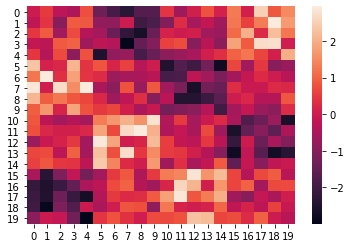

In [95]:
N=20
phigh=3#0.26
ilow=-3#0.26

def positive_connection(N, phigh):
    return np.random.uniform(low=0, high=phigh, size=(N//4,N//4))
def negative_connection(N, ilow):
    return np.random.uniform(low=ilow, high=0, size=(N//4,N//4))    
def neutral_connection(N):
    return np.random.uniform(low=-1, high=1, size=(N,N))    


# create large matrix W
W = neutral_connection(N)
W[0:N//4, N//4:N//2] = negative_connection(N, ilow)
W[N//4:N//2, N//2:3*N//4] = negative_connection(N, ilow)
W[N//2:3*N//4, 3*N//4:N] = negative_connection(N, ilow)
W[3*N//4:N, 0:N//4] = negative_connection(N, ilow)

W[N//4:N//2, 0:N//4] = positive_connection(N, phigh)
W[N//2:3*N//4, N//4:N//2] = positive_connection(N, phigh)
W[3*N//4:N, N//2:3*N//4] = positive_connection(N, phigh)
W[0:N//4, 3*N//4:N] = positive_connection(N, phigh)

sns.heatmap(W)

<AxesSubplot:>

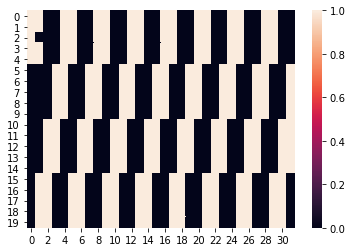

In [96]:
N_V = N
T = 32
n_batches = 100
spikes = np.zeros(shape=(N, T, n_batches))
idx = torch.randperm(N)
for i in range(n_batches):
    spikes[:N//4, 0, i] = np.ones(N//4)#np.random.choice([0,1],size=(N))

    for t in range(1,T):
        spikes[:, t, i] = np.random.random(N) < (spikes[:,t-1, i]@W + np.random.uniform(0, 0.5,size=N))
        spikes[idx, t, i]
#spikes = torch.reshape(torch.tensor(spikes), [N_V, T*n_batches])
sns.heatmap(spikes[:,:, 0])
#spikes = torch.reshape(spikes, [N, T])

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:45<00:00,  1.02s/it]


Text(0, 0.5, 'RMS error')

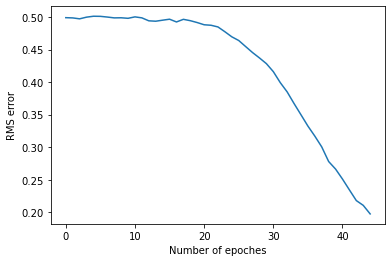

In [97]:
data = torch.tensor(spikes, dtype=torch.float)
crtrbm = RTRBM(data, N_H=10)

crtrbm.learn(n_epochs=45, lr=1e-4, batchsize=10)

plt.plot(crtrbm.errors)
plt.xlabel("Number of epoches")
plt.ylabel("RMS error")

Text(0.5, 1.0, 'Sample 3')

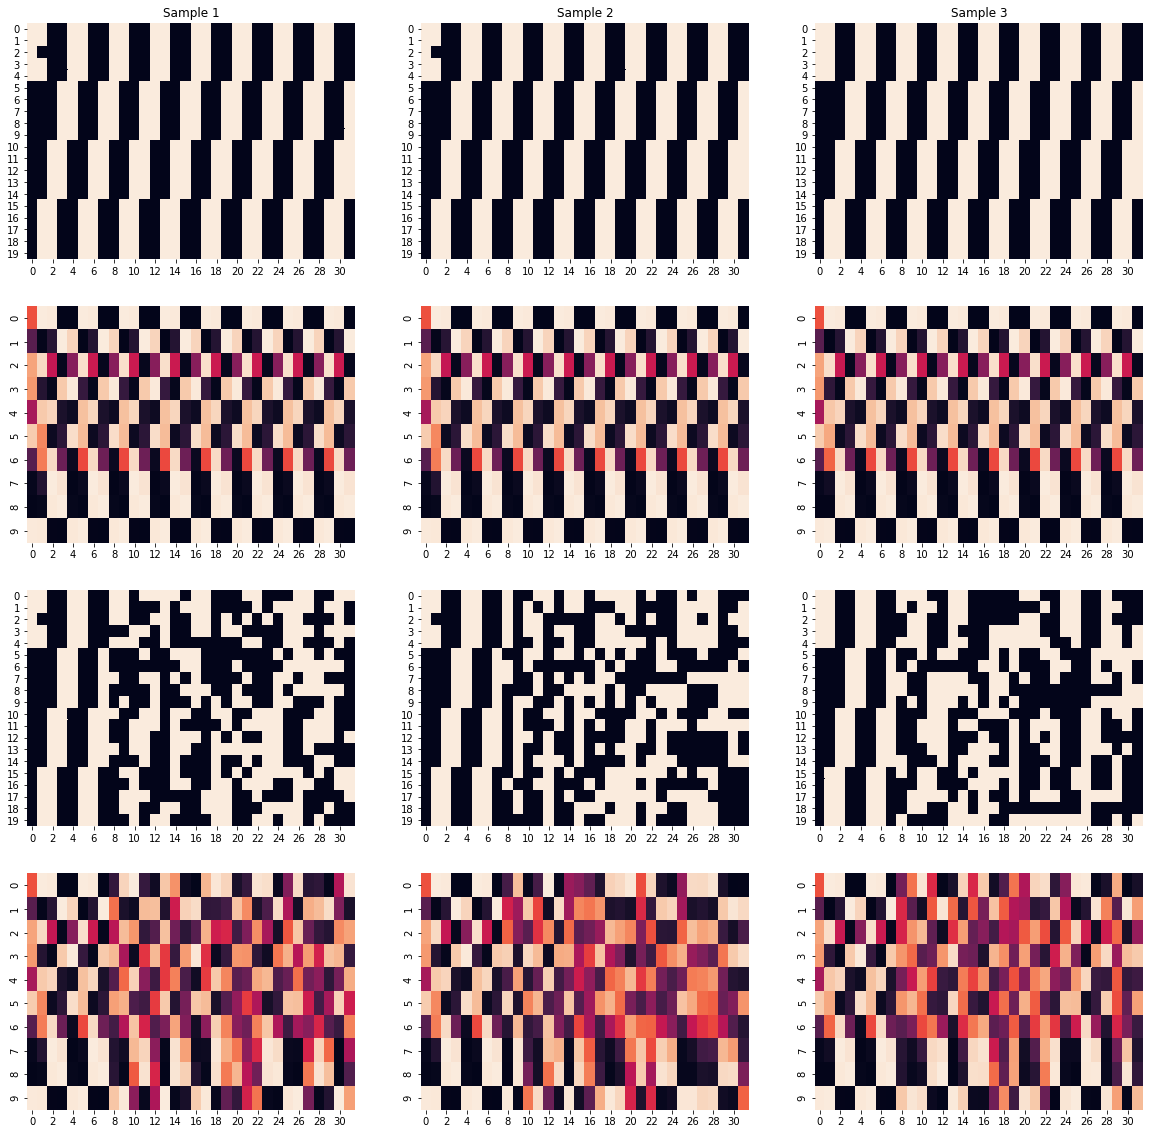

In [98]:
v1, r1 = crtrbm.infer(data[:, :8, 0], mode=1, pre_gibbs_k=20, gibbs_k=10, disable_tqdm=True)
v2, r2 = crtrbm.infer(data[:, :8, 1], mode=1, pre_gibbs_k=20, gibbs_k=10, disable_tqdm=True)
v3, r3 = crtrbm.infer(data[:, :8, 2], mode=1, pre_gibbs_k=20, gibbs_k=10, disable_tqdm=True)

rr1 = crtrbm.visible_to_expected_hidden(data[:, :, 0].to('cuda'))
rr2 = crtrbm.visible_to_expected_hidden(data[:, :, 1].to('cuda'))
rr3 = crtrbm.visible_to_expected_hidden(data[:, :, 2].to('cuda'))
fig, ax = plt.subplots(4, 3, figsize=(20,20))
sns.heatmap(data[:, :, 0], ax=ax[0, 0], cbar=False)
sns.heatmap(rr1.cpu(), ax=ax[1, 0], cbar=False)
sns.heatmap(v1.cpu(), ax=ax[2, 0], cbar=False)
sns.heatmap(r1.cpu(), ax=ax[3, 0], cbar=False)
ax[0, 0].set_title('Sample 1')
sns.heatmap(data[:, :, 1], ax=ax[0, 1], cbar=False)
sns.heatmap(rr2.cpu(), ax=ax[1, 1], cbar=False)
sns.heatmap(v2.cpu(), ax=ax[2, 1], cbar=False)
sns.heatmap(r2.cpu(), ax=ax[3, 1], cbar=False)
ax[0, 1].set_title('Sample 2')
sns.heatmap(data[:, :, 2], ax=ax[0, 2], cbar=False)
sns.heatmap(rr3.cpu(), ax=ax[1, 2], cbar=False)
sns.heatmap(v3.cpu(), ax=ax[2, 2], cbar=False)
sns.heatmap(r3.cpu(), ax=ax[3, 2], cbar=False)
ax[0, 2].set_title('Sample 3')

In [99]:
def mse(x, y):
    return torch.mean((x - y)**2)

In [101]:
mse(data[:, :, 0], v1.cpu())

tensor(0.3063)

In [102]:
mse(rr1.cpu(), r1.cpu())

tensor(0.1542)

<AxesSubplot:>

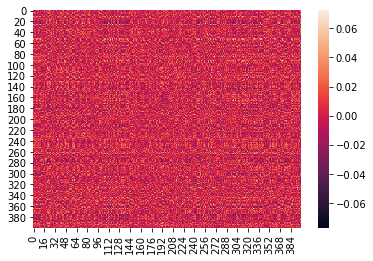

In [75]:
sns.heatmap(crtrbm.W_acc.cpu())

In [58]:
crtrbm.W_acc = torch.zeros(4, 4, device='cuda')

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 89.92it/s]


Text(0.5, 1.0, 'Sample 3')

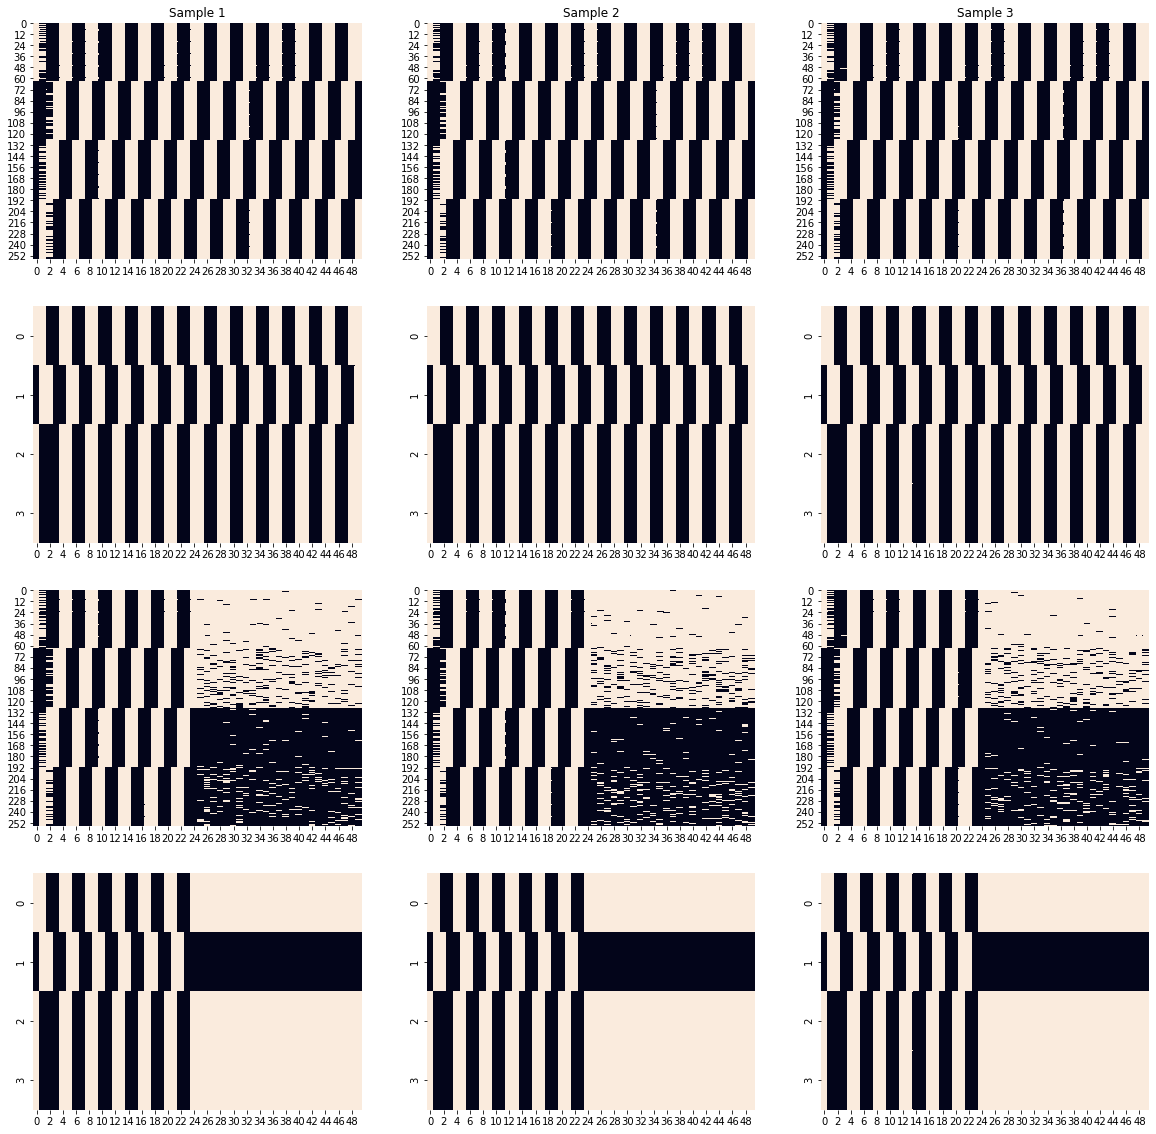

In [59]:
v1, r1 = crtrbm.infer(data[:, :25, 0], mode=1)
v2, r2 = crtrbm.infer(data[:, :25, 1], mode=1)
v3, r3 = crtrbm.infer(data[:, :25, 2], mode=1)

rr1 = crtrbm.visible_to_expected_hidden(data[:, :, 0].to('cuda'))
rr2 = crtrbm.visible_to_expected_hidden(data[:, :, 1].to('cuda'))
rr3 = crtrbm.visible_to_expected_hidden(data[:, :, 2].to('cuda'))
fig, ax = plt.subplots(4, 3, figsize=(20,20))
sns.heatmap(data[:, :, 0], ax=ax[0, 0], cbar=False)
sns.heatmap(rr1.cpu(), ax=ax[1, 0], cbar=False)
sns.heatmap(v1.cpu(), ax=ax[2, 0], cbar=False)
sns.heatmap(r1.cpu(), ax=ax[3, 0], cbar=False)
ax[0, 0].set_title('Sample 1')
sns.heatmap(data[:, :, 1], ax=ax[0, 1], cbar=False)
sns.heatmap(rr2.cpu(), ax=ax[1, 1], cbar=False)
sns.heatmap(v2.cpu(), ax=ax[2, 1], cbar=False)
sns.heatmap(r2.cpu(), ax=ax[3, 1], cbar=False)
ax[0, 1].set_title('Sample 2')
sns.heatmap(data[:, :, 2], ax=ax[0, 2], cbar=False)
sns.heatmap(rr3.cpu(), ax=ax[1, 2], cbar=False)
sns.heatmap(v3.cpu(), ax=ax[2, 2], cbar=False)
sns.heatmap(r3.cpu(), ax=ax[3, 2], cbar=False)
ax[0, 2].set_title('Sample 3')

<AxesSubplot:>

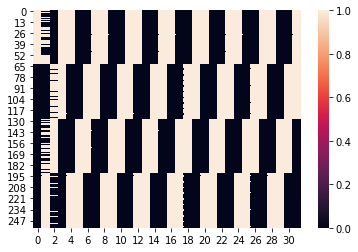

In [84]:
N=256
phigh=3#0.26
ilow=-3#0.26

def positive_connection(N, phigh):
    return np.random.uniform(low=0, high=phigh, size=(N//4,N//4))
def negative_connection(N, ilow):
    return np.random.uniform(low=ilow, high=0, size=(N//4,N//4))    
def neutral_connection(N):
    return np.random.uniform(low=-1, high=1, size=(N,N))    


# create large matrix W
W = neutral_connection(N)
W[0:N//4, N//4:N//2] = negative_connection(N, ilow)
W[N//4:N//2, N//2:3*N//4] = negative_connection(N, ilow)
W[N//2:3*N//4, 3*N//4:N] = negative_connection(N, ilow)
W[3*N//4:N, 0:N//4] = negative_connection(N, ilow)

W[N//4:N//2, 0:N//4] = positive_connection(N, phigh)
W[N//2:3*N//4, N//4:N//2] = positive_connection(N, phigh)
W[3*N//4:N, N//2:3*N//4] = positive_connection(N, phigh)
W[0:N//4, 3*N//4:N] = positive_connection(N, phigh)

N_V = N
T = 32
n_batches = 100
spikes = np.zeros(shape=(N, T, n_batches))
idx = torch.randperm(N)
for i in range(n_batches):
    spikes[:N//4, 0, i] = np.ones(N//4)#np.random.choice([0,1],size=(N))

    for t in range(1,T):
        spikes[:, t, i] = np.random.random(N) < (spikes[:,t-1, i]@W + np.random.uniform(0, 0.5,size=N))
        spikes[idx, t, i]
#spikes = torch.reshape(torch.tensor(spikes), [N_V, T*n_batches])
sns.heatmap(spikes[:,:, 0])

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.49s/it]


Text(0, 0.5, 'RMS error')

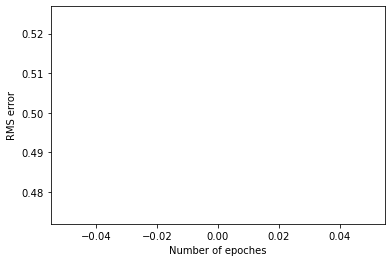

In [93]:
data = torch.tensor(spikes, dtype=torch.float)
crtrbm = RTRBM(data, N_H=100)

crtrbm.learn(n_epochs=1, lr=1e-4, batchsize=10)

plt.plot(crtrbm.errors)
plt.xlabel("Number of epoches")
plt.ylabel("RMS error")

Text(0.5, 1.0, 'Sample 3')

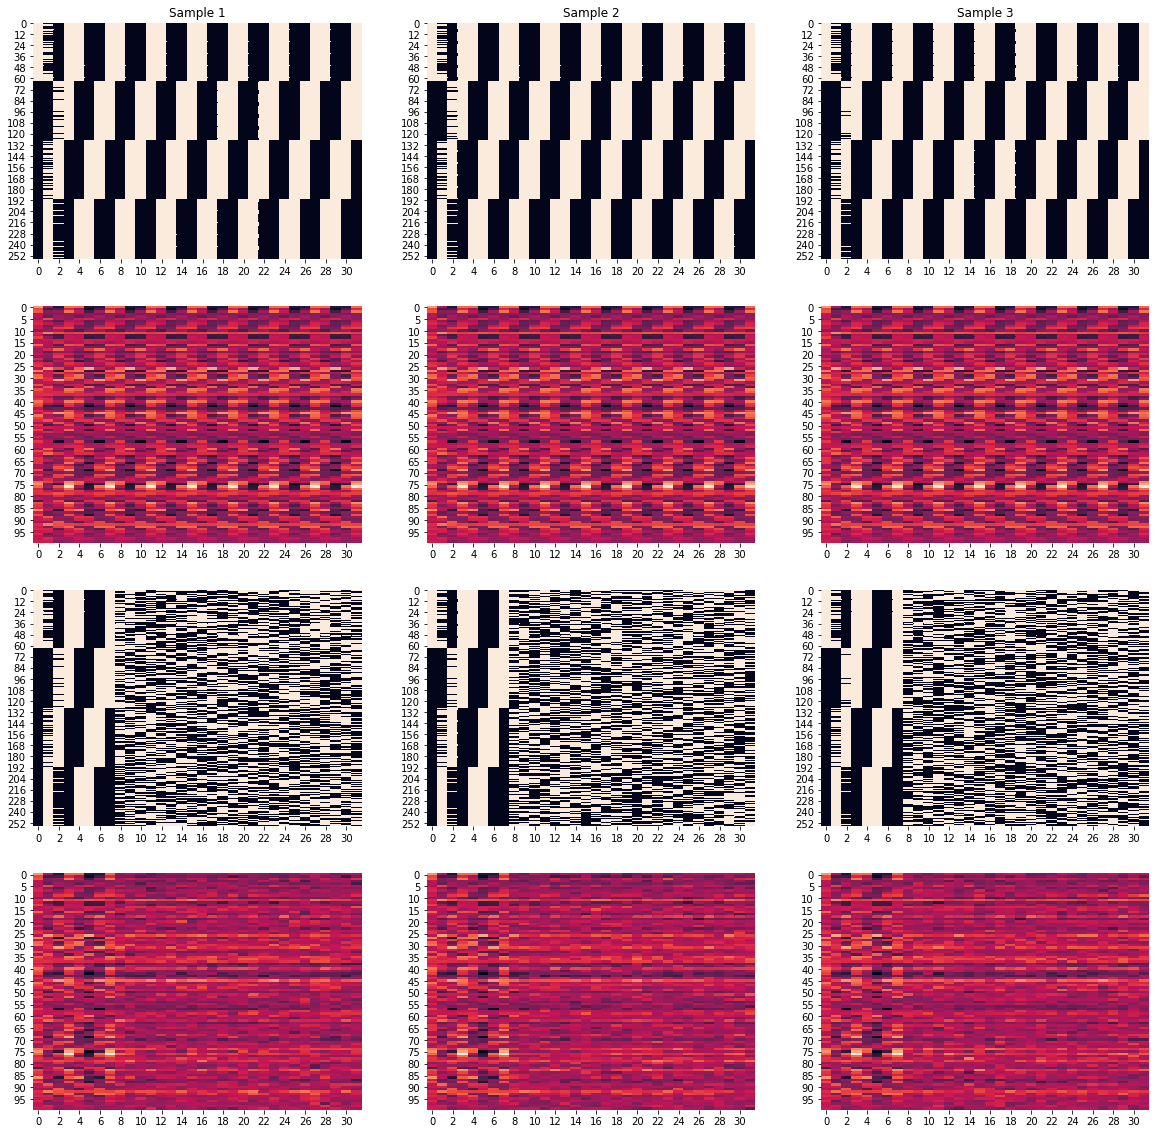

In [94]:
v1, r1 = crtrbm.infer(data[:, :8, 0], mode=1, pre_gibbs_k=20, gibbs_k=10, disable_tqdm=True)
v2, r2 = crtrbm.infer(data[:, :8, 1], mode=1, pre_gibbs_k=20, gibbs_k=10, disable_tqdm=True)
v3, r3 = crtrbm.infer(data[:, :8, 2], mode=1, pre_gibbs_k=20, gibbs_k=10, disable_tqdm=True)

rr1 = crtrbm.visible_to_expected_hidden(data[:, :, 0].to('cuda'))
rr2 = crtrbm.visible_to_expected_hidden(data[:, :, 1].to('cuda'))
rr3 = crtrbm.visible_to_expected_hidden(data[:, :, 2].to('cuda'))
fig, ax = plt.subplots(4, 3, figsize=(20,20))
sns.heatmap(data[:, :, 0], ax=ax[0, 0], cbar=False)
sns.heatmap(rr1.cpu(), ax=ax[1, 0], cbar=False)
sns.heatmap(v1.cpu(), ax=ax[2, 0], cbar=False)
sns.heatmap(r1.cpu(), ax=ax[3, 0], cbar=False)
ax[0, 0].set_title('Sample 1')
sns.heatmap(data[:, :, 1], ax=ax[0, 1], cbar=False)
sns.heatmap(rr2.cpu(), ax=ax[1, 1], cbar=False)
sns.heatmap(v2.cpu(), ax=ax[2, 1], cbar=False)
sns.heatmap(r2.cpu(), ax=ax[3, 1], cbar=False)
ax[0, 1].set_title('Sample 2')
sns.heatmap(data[:, :, 2], ax=ax[0, 2], cbar=False)
sns.heatmap(rr3.cpu(), ax=ax[1, 2], cbar=False)
sns.heatmap(v3.cpu(), ax=ax[2, 2], cbar=False)
sns.heatmap(r3.cpu(), ax=ax[3, 2], cbar=False)
ax[0, 2].set_title('Sample 3')